In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from backtest import backtest_dca

In [2]:
start = "2023-01-01"
end = "2026-01-01"

symbols = {
    "BTC": "BTC-USD",
    "ETH": "ETH-USD",
    "BNB": "BNB-USD",
    "XRP": "XRP-USD",
    "SOL": "SOL-USD",
    "TRON": "TRX-USD",
    "ADA": "ADA-USD",
    "XMR": "XMR-USD",

    "LINK": "LINK-USD",
    "ATOM": "ATOM-USD",
    "AVAX": "AVAX-USD",
    "DOT": "DOT-USD",
}

initial_capital = 1.0
target_weights = None
threshold = 0.05
fee = 0.001   

In [3]:
# df = pd.DataFrame()
# for k, v in symbols.items():
#     df[k] = yf.download(v, start=start, end=end)["Close"]

# df.to_csv("prices.csv")

In [4]:
df_origin = pd.read_csv("prices.csv", index_col=0, parse_dates=True)
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,ATOM,AVAX,DOT
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,9.464469,10.865915,4.370816
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,9.802422,11.153615,4.489374
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,10.161021,11.384450,4.524364
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,10.198363,12.077613,4.630191
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,10.076512,11.740196,4.617662
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,87802.156250,2947.998291,844.554504,1.872853,124.647713,0.284630,0.369542,453.496796,12.497621,2.081378,12.686422,1.913854
2025-12-28,87835.835938,2948.568115,858.828796,1.864360,125.199356,0.284914,0.368502,453.068542,12.477210,2.073132,12.636359,1.848762
2025-12-29,87138.140625,2934.538330,851.187561,1.847724,123.125229,0.284616,0.352915,437.445709,12.290201,1.963394,12.357569,1.822235


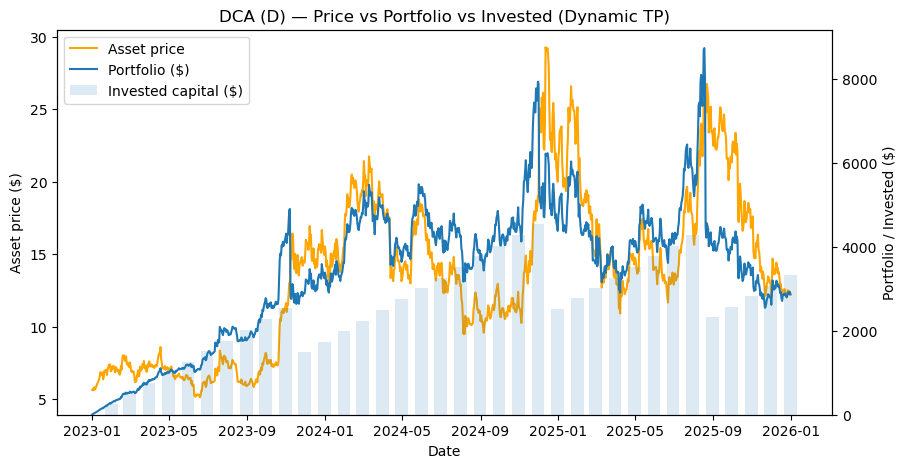

{'Total_invested': 9133.333333333283,
 'Final_value': 2873.7390503541046,
 'Realized_profit': 6712.346241594639,
 'Num_rebalances': 3}

In [5]:
sol_prices = df_origin["LINK"]
invest_sum = 250 / 30

dca_result, dca_metrics = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="D",
    available_sum=10000,
    profit_multiple=2,
    fee=0.001,
    plot=True
)

dca_metrics

In [10]:
dca_result

,Portfolio,Invested,Realized_profit
2023-01-01,8.325000,8.333333,0.0
2023-01-02,16.746516,16.666667,0.0
2023-01-03,24.878568,25.000000,0.0
2023-01-04,34.008660,33.333333,0.0
2023-01-05,41.418425,41.666667,0.0
...,...,...,...
2025-12-27,2913.019284,3300.000000,0.0
2025-12-28,2916.586875,3308.333333,0.0
2025-12-29,2881.197970,3316.666667,0.0
2025-12-30,2918.630264,3325.000000,0.0


# всі монети

In [7]:
results = {}

for symbol in symbols.keys():
    prices = df_origin[symbol]
    invest_sum = 250 / 30

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="D",
        available_sum=10000,
        profit_multiple=3,
        fee=0.001,
        plot=False
    )

    results[symbol] = dca_metrics_one

In [8]:
res = pd.DataFrame(results).T

In [9]:
res['Total_sell'] = res['Final_value'] + res['Realized_profit']
res['Profit'] = res['Total_sell'] - res['Total_invested']
res.sort_values('Profit', ascending=False)

,Total_invested,Final_value,Realized_profit,Num_rebalances,Total_sell,Profit
TRON,9133.333333,12076.814501,10107.601956,1.0,22184.416458,13051.083124
XMR,9133.333333,21818.697677,0.000000,0.0,21818.697677,12685.364344
XRP,9133.333333,7039.072576,11875.676100,2.0,18914.748675,9781.415342
BNB,9133.333333,9703.201828,8614.836739,1.0,18318.038567,9184.705234
BTC,9133.333333,16472.350138,0.000000,0.0,16472.350138,7339.016805
SOL,9133.333333,5551.120022,10224.358834,3.0,15775.478857,6642.145523
LINK,9133.333333,6067.499893,5942.091476,1.0,12009.591368,2876.258035
ETH,9133.333333,11362.315498,0.000000,0.0,11362.315498,2228.982164
ADA,9133.333333,4173.001628,5983.318330,1.0,10156.319958,1022.986625
AVAX,9133.333333,4291.904059,2941.152661,1.0,7233.056720,-1900.276614
